In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
import lightgbm as lgbm
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import *
from numpy import mean
from numpy import std
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.shape

(2000, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
(df==0).sum(axis=0)

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

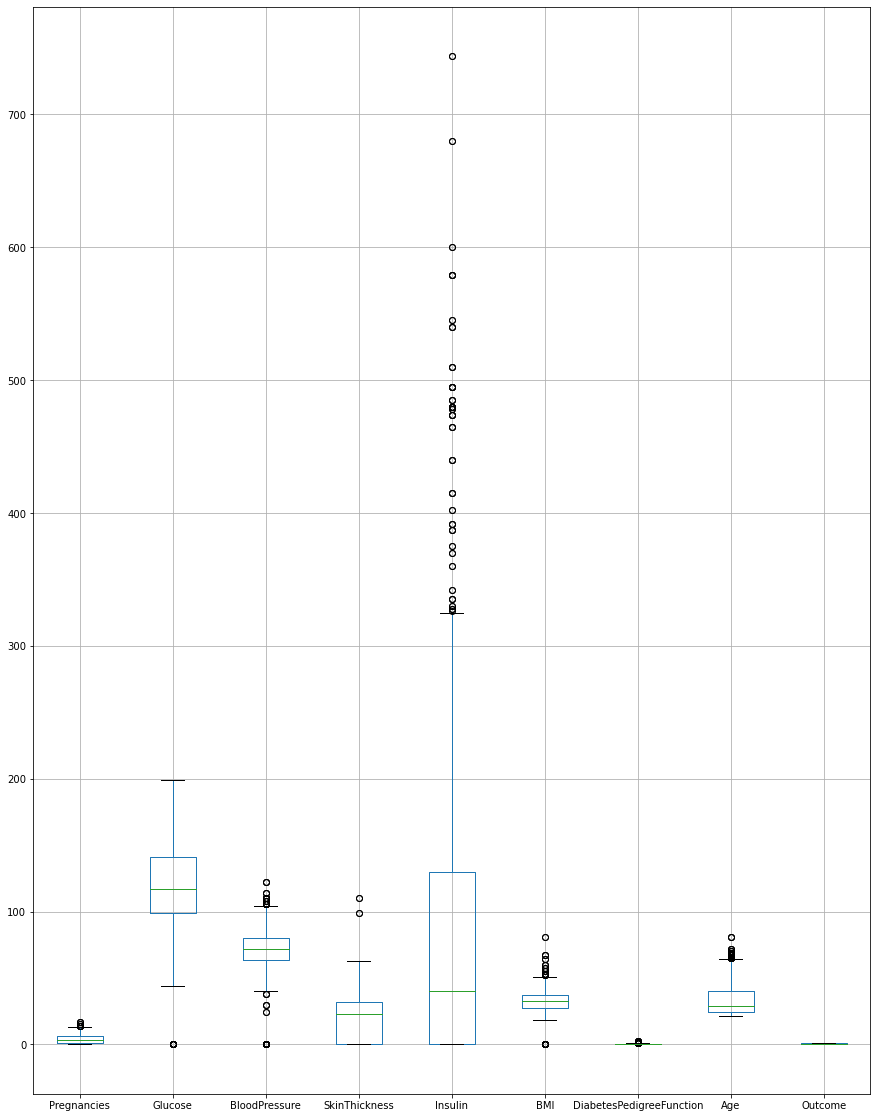

In [9]:
df.boxplot(figsize=(15,20))

In [10]:
#replacing zero values with mean
df.loc[df['Glucose']==0, 'Glucose']=df['Glucose'].mean()
df.loc[df['BMI']==0, 'BMI']=df['BMI'].mean()
df.loc[df['BloodPressure']==0, 'BloodPressure']=df['BloodPressure'].mean()
df.loc[df['SkinThickness']==0, 'SkinThickness']=df['SkinThickness'].mean()
df.loc[df['Insulin']==0,'Insulin']=df['Insulin'].mean()

In [11]:
#removing outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(1598, 9)

In [12]:
print(sorted(Counter(df_out['Outcome']).items()))
X = df_out.drop(["Outcome"],axis=1)
y = df_out["Outcome"]
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 1113), (1, 485)]
[(0, 1113), (1, 1113)] (2226,)


In [13]:
X=X_resampled
y=y_resampled

In [14]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [17]:
score=cross_val_score(RandomForestClassifier( ),X, y,cv=5 )

score

array([1., 1., 1., 1., 1.])

In [18]:
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)
y_pred = rfm.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.9820627802690582


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8632286995515696


In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7488789237668162


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=5,ccp_alpha=0.0001, criterion='gini',max_features=5)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9865470852017937


In [30]:
lgbm_model = lgbm.LGBMClassifier().fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9775784753363229


In [31]:
cat=CatBoostClassifier(learning_rate=0.2)
cat.fit(X_train,y_train)
y_pred=cat.predict(X_test)
print(accuracy_score(y_test,y_pred))

0:	learn: 0.5879860	total: 8.68ms	remaining: 8.67s
1:	learn: 0.5370204	total: 11.2ms	remaining: 5.59s
2:	learn: 0.4860790	total: 14.1ms	remaining: 4.67s
3:	learn: 0.4367419	total: 16.2ms	remaining: 4.02s
4:	learn: 0.4097805	total: 18.2ms	remaining: 3.61s
5:	learn: 0.3887993	total: 19.8ms	remaining: 3.28s
6:	learn: 0.3713174	total: 21.6ms	remaining: 3.06s
7:	learn: 0.3598948	total: 23.2ms	remaining: 2.87s
8:	learn: 0.3471473	total: 24.8ms	remaining: 2.73s
9:	learn: 0.3260007	total: 27.6ms	remaining: 2.73s
10:	learn: 0.3166901	total: 29.7ms	remaining: 2.67s
11:	learn: 0.3031265	total: 31.2ms	remaining: 2.57s
12:	learn: 0.2980196	total: 32.9ms	remaining: 2.5s
13:	learn: 0.2928867	total: 34.6ms	remaining: 2.44s
14:	learn: 0.2733362	total: 36.2ms	remaining: 2.38s
15:	learn: 0.2659655	total: 37.7ms	remaining: 2.32s
16:	learn: 0.2603419	total: 39.5ms	remaining: 2.29s
17:	learn: 0.2544116	total: 41.9ms	remaining: 2.28s
18:	learn: 0.2463214	total: 43.8ms	remaining: 2.26s
19:	learn: 0.2435049	to

222:	learn: 0.0079258	total: 336ms	remaining: 1.17s
223:	learn: 0.0078817	total: 337ms	remaining: 1.17s
224:	learn: 0.0078334	total: 339ms	remaining: 1.17s
225:	learn: 0.0078334	total: 340ms	remaining: 1.16s
226:	learn: 0.0077666	total: 341ms	remaining: 1.16s
227:	learn: 0.0077137	total: 343ms	remaining: 1.16s
228:	learn: 0.0076488	total: 345ms	remaining: 1.16s
229:	learn: 0.0075560	total: 346ms	remaining: 1.16s
230:	learn: 0.0075136	total: 348ms	remaining: 1.16s
231:	learn: 0.0074855	total: 349ms	remaining: 1.16s
232:	learn: 0.0074498	total: 351ms	remaining: 1.16s
233:	learn: 0.0073981	total: 353ms	remaining: 1.16s
234:	learn: 0.0073260	total: 355ms	remaining: 1.16s
235:	learn: 0.0072334	total: 357ms	remaining: 1.16s
236:	learn: 0.0072127	total: 359ms	remaining: 1.15s
237:	learn: 0.0071549	total: 360ms	remaining: 1.15s
238:	learn: 0.0071170	total: 362ms	remaining: 1.15s
239:	learn: 0.0070760	total: 363ms	remaining: 1.15s
240:	learn: 0.0070412	total: 364ms	remaining: 1.15s
241:	learn: 

470:	learn: 0.0040275	total: 661ms	remaining: 742ms
471:	learn: 0.0040274	total: 662ms	remaining: 741ms
472:	learn: 0.0040274	total: 664ms	remaining: 740ms
473:	learn: 0.0040273	total: 665ms	remaining: 738ms
474:	learn: 0.0040273	total: 666ms	remaining: 736ms
475:	learn: 0.0040273	total: 668ms	remaining: 735ms
476:	learn: 0.0040007	total: 669ms	remaining: 734ms
477:	learn: 0.0039858	total: 671ms	remaining: 732ms
478:	learn: 0.0039857	total: 672ms	remaining: 731ms
479:	learn: 0.0039850	total: 673ms	remaining: 730ms
480:	learn: 0.0039850	total: 675ms	remaining: 729ms
481:	learn: 0.0039850	total: 677ms	remaining: 728ms
482:	learn: 0.0039850	total: 679ms	remaining: 726ms
483:	learn: 0.0039850	total: 680ms	remaining: 725ms
484:	learn: 0.0039846	total: 681ms	remaining: 723ms
485:	learn: 0.0039846	total: 682ms	remaining: 722ms
486:	learn: 0.0039845	total: 684ms	remaining: 720ms
487:	learn: 0.0039845	total: 685ms	remaining: 719ms
488:	learn: 0.0039845	total: 686ms	remaining: 717ms
489:	learn: 

681:	learn: 0.0036405	total: 971ms	remaining: 453ms
682:	learn: 0.0036404	total: 973ms	remaining: 451ms
683:	learn: 0.0036404	total: 974ms	remaining: 450ms
684:	learn: 0.0036404	total: 975ms	remaining: 448ms
685:	learn: 0.0036403	total: 976ms	remaining: 447ms
686:	learn: 0.0036403	total: 978ms	remaining: 445ms
687:	learn: 0.0036402	total: 980ms	remaining: 444ms
688:	learn: 0.0036401	total: 981ms	remaining: 443ms
689:	learn: 0.0036401	total: 983ms	remaining: 441ms
690:	learn: 0.0036400	total: 984ms	remaining: 440ms
691:	learn: 0.0036400	total: 985ms	remaining: 438ms
692:	learn: 0.0036398	total: 987ms	remaining: 437ms
693:	learn: 0.0036398	total: 988ms	remaining: 436ms
694:	learn: 0.0036398	total: 990ms	remaining: 434ms
695:	learn: 0.0036398	total: 991ms	remaining: 433ms
696:	learn: 0.0036396	total: 994ms	remaining: 432ms
697:	learn: 0.0036396	total: 996ms	remaining: 431ms
698:	learn: 0.0036396	total: 997ms	remaining: 429ms
699:	learn: 0.0036395	total: 998ms	remaining: 428ms
700:	learn: 

889:	learn: 0.0034038	total: 1.28s	remaining: 158ms
890:	learn: 0.0034037	total: 1.28s	remaining: 157ms
891:	learn: 0.0034037	total: 1.28s	remaining: 155ms
892:	learn: 0.0034038	total: 1.28s	remaining: 154ms
893:	learn: 0.0033726	total: 1.29s	remaining: 153ms
894:	learn: 0.0033726	total: 1.29s	remaining: 151ms
895:	learn: 0.0033726	total: 1.29s	remaining: 150ms
896:	learn: 0.0033726	total: 1.29s	remaining: 148ms
897:	learn: 0.0033725	total: 1.29s	remaining: 147ms
898:	learn: 0.0033725	total: 1.29s	remaining: 145ms
899:	learn: 0.0033725	total: 1.29s	remaining: 144ms
900:	learn: 0.0033724	total: 1.3s	remaining: 143ms
901:	learn: 0.0033724	total: 1.3s	remaining: 141ms
902:	learn: 0.0033723	total: 1.3s	remaining: 140ms
903:	learn: 0.0033723	total: 1.3s	remaining: 138ms
904:	learn: 0.0033724	total: 1.3s	remaining: 137ms
905:	learn: 0.0033723	total: 1.3s	remaining: 135ms
906:	learn: 0.0033723	total: 1.31s	remaining: 134ms
907:	learn: 0.0033722	total: 1.31s	remaining: 133ms
908:	learn: 0.0033

In [37]:
level0 = list()
level0.append(('gb',GradientBoostingClassifier(n_estimators=50,learning_rate=0.5)))
level0.append(('lgbm', lightgbm.LGBMClassifier()))
level0.append(('cart', DecisionTreeClassifier(random_state=5,ccp_alpha=0.0001, criterion='gini',min_samples_split=0.1,min_samples_leaf=1,splitter='best')))
level0.append(('cat', CatBoostClassifier(learning_rate=0.2)))
level1 = RandomForestClassifier(n_estimators=30,verbose=0)
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10,n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9910313901345291


In [38]:
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[213   0]
 [  4 229]]
Outcome values : 
 213 0 4 229
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       213
           0       1.00      0.98      0.99       233

    accuracy                           0.99       446
   macro avg       0.99      0.99      0.99       446
weighted avg       0.99      0.99      0.99       446



In [39]:
import pickle
model = pickle.dumps(model)
# saving the model to the local file system
filename = 'diabetes_prediction.pickle'
pickle.dump(model, open(filename, 'wb'))